# Pair Programming Limpieza III

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("datos/2.ataques_limpio.csv", index_col = 0)
df.head(2)

,case_number,year,country,age,species_,mes,fatal,sexo,especie_cat,age_limpio
0,2018.06.25,2018,usa,57,White shark,Jun,n,F,White,57.0
1,2018.06.03.a,2018,brazil,18,Tiger shark,Jun,y,M,Tiger,18.0


### 1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [4]:
# Identificamos las columnas numéricas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(1)

,year,age_limpio
0,2018,57.0


### 2. Identifica visualmente los outliers

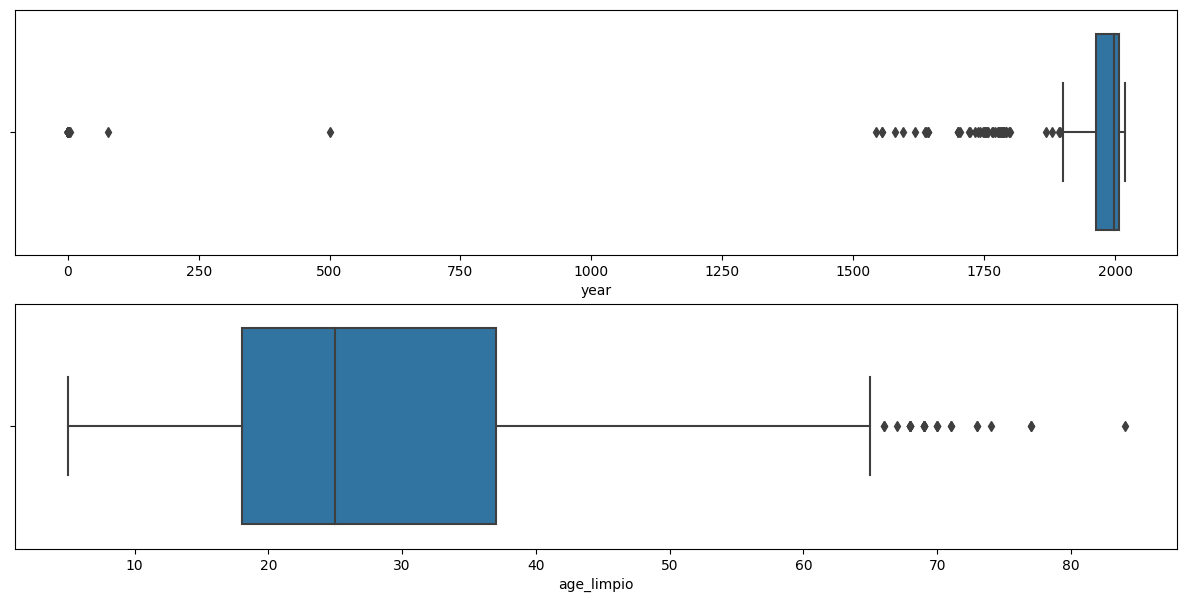

In [18]:
# Generamos un boxplot para cada columna numérica
fig, ax = plt.subplots(2, 1, figsize=(15,7))

for i, column in enumerate(df_numericas):
    sns.boxplot(x=df_numericas[column], data=df_numericas, ax=ax[i])
plt.show()

### 3. Identifica sobre el dataframe las filas que son outliers

In [6]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        print(col)
        display(outliers_data)
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [7]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'age_limpio']

In [8]:
indices = detectar_outliers(lista_columnas, df)


year


,case_number,year,country,age,species_,mes,fatal,sexo,especie_cat,age_limpio
1498,1894.11.28,1894,australia,19,10' to 12' shark,Nov,n,M,Unspecified,19.0
1499,1892.03.02,1892,australia,21,12' shark,Mar,n,M,Unspecified,21.0
1500,1880.11.25,1880,australia,12,Bull shark,Nov,y,M,Bull,12.0
1501,1868.05.13,1868,india,35,Identified as C. gangeticus by Dr. J. Fayrer,May,y,M,Unspecified,35.0
1502,1800.00.00,1800,seychelles,NaN,NaN,NaN,y,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1667,ND.0005,0,australia,NaN,NaN,Before,y,M,NaN,NaN
1668,ND.0004,0,australia,NaN,NaN,Before,y,M,NaN,NaN
1669,ND.0003,0,usa,NaN,NaN,NaN,y,M,NaN,NaN
1670,ND.0002,0,panama,NaN,NaN,NaN,y,M,NaN,NaN


age_limpio


,case_number,year,country,age,species_,mes,fatal,sexo,especie_cat,age_limpio
12,2018.03.09.b,2018,australia,69,3.5 m shark,Mar,n,M,Unspecified,69.0
30,2017.08.23,2017,usa,69,"White shark, 5' to 7'",Aug,n,M,White,69.0
51,2016.11.28,2016,australia,73,"Broadnose sevengill shark, 1.5 m",Nov,n,M,Unspecified,73.0
80,2016.04.09,2016,new caledonia,69,"Tiger shark, 2.5 m",Apr,y,F,Tiger,69.0
84,2015.12.22,2015,usa,71,9' shark,Dec,n,M,Unspecified,71.0
121,2015.07.01,2015,usa,68,6' to 7' shark,Jul,n,M,Unspecified,68.0
139,2015.04.24.c,2015,australia,71,"White shark, 3 m",Jun,n,M,White,71.0
141,2015.04.03,2015,usa,70,Bull shark,Apr,n,M,Bull,70.0
184,2014.03.22.b,2014,south africa,66,2 m shark,Mar,y,M,Unspecified,66.0
202,2013.10.11,2013,south africa,74,White shark,Oct,y,M,White,74.0


In [9]:
print (indices)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

### 4. Reemplaza los outliers por el estadístico más correcto.

In [19]:
# Conocemos los prinicpales estadícticos de la columnas numéricas para decidir por que valor reemplazar
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1672.0,1832.688397,528.969901,0.0,1964.0,1997.0,2008.0,2018.0
age_limpio,1514.0,28.669089,14.059669,5.0,18.0,25.0,37.0,84.0


In [20]:
# Creamos una copia del df original
df_replace = df.copy()

In [21]:
# Imrpimimos el diccionario obtenido tras la función para detectar outliers
print (indices)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

In [22]:
# Se reemplazan los valores para cada columna
for k, v in indices.items():
    mediana = df_replace[k].median() # calculamos la media para cada una de las columnas
    for i in v: # iteremos por la lista de valores para cada columna
        df_replace.loc[i,k] = mediana # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [23]:
# Comprobamos el nuevo dataframe de columnas numéricas
df_replace_num = df_replace.select_dtypes(include=np.number)
df_replace_num.head()

,year,age_limpio
0,2018,57.0
1,2018,18.0
2,2018,15.0
3,2018,32.0
4,2018,21.0


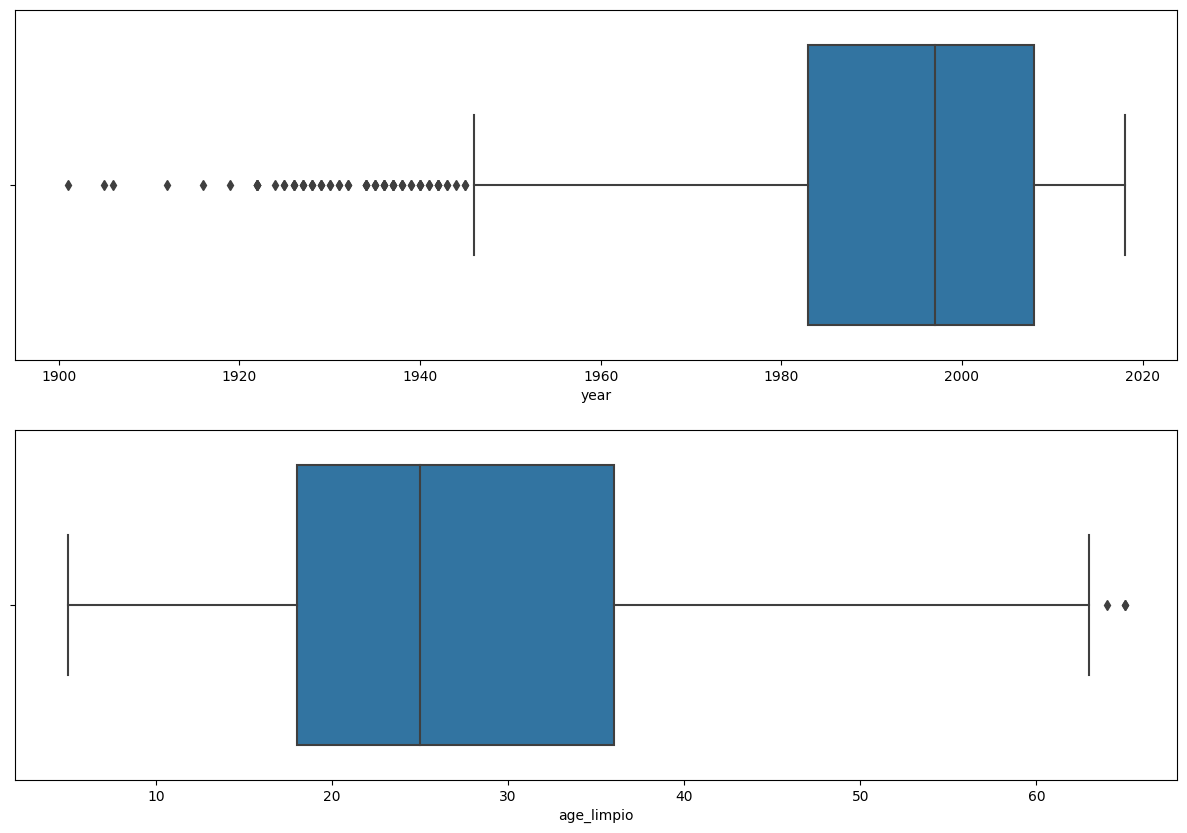

In [24]:
# Observamos la nueva distribucion de los datos
fig, ax = plt.subplots(2, 1, figsize=(15,10))

for i, column in enumerate(df_replace_num):
    sns.boxplot(x=df_replace_num[column], data=df_replace_num, ax=ax[i])
plt.show()

### 5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [16]:
df_replace_num.to_csv("datos/3.ataques_limpio.csv")